In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report
dataset = pd.read_csv('Desktop/house_data.csv')
print(dataset)

               id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242   

In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [3]:
dataset.corr(method='pearson')[['price']].sort_values('price')

,price
zipcode,-0.053203
id,-0.016762
long,0.021626
condition,0.036362
yr_built,0.054012
sqft_lot15,0.082447
sqft_lot,0.089661
yr_renovated,0.126434
floors,0.256794
waterfront,0.266369


In [4]:
import datetime
dataset['Total Years']=datetime.datetime.now().year-dataset['yr_built']
dataset.drop("yr_built",axis=1,inplace=True)
#dataset.drop("yr_renovated",axis=1,inplace=True)
dataset.drop("date",axis=1,inplace=True)
dataset.drop("id",axis=1,inplace=True)
dataset.drop("waterfront",axis=1,inplace=True)
#dataset.drop("view",axis=1,inplace=True)
dataset.drop("zipcode",axis=1,inplace=True)
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
lbl_encoders["yr_renovated"]=LabelEncoder()
dataset["yr_renovated"]=lbl_encoders["yr_renovated"].fit_transform(dataset["yr_renovated"])
dataset=dataset.drop_duplicates()
print(dataset)

          price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  view  \
0      221900.0         3       1.00         1180      5650     1.0     0   
1      538000.0         3       2.25         2570      7242     2.0     0   
2      180000.0         2       1.00          770     10000     1.0     0   
3      604000.0         4       3.00         1960      5000     1.0     0   
4      510000.0         3       2.00         1680      8080     1.0     0   
...         ...       ...        ...          ...       ...     ...   ...   
21608  360000.0         3       2.50         1530      1131     3.0     0   
21609  400000.0         4       2.50         2310      5813     2.0     0   
21610  402101.0         2       0.75         1020      1350     2.0     0   
21611  400000.0         3       2.50         1600      2388     2.0     0   
21612  325000.0         2       0.75         1020      1076     2.0     0   

       condition  grade  sqft_above  sqft_basement  yr_renovated      lat  

C:\Users\padhu\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


0.8755334988462588


Text(0, 0.5, 'Actual Price')

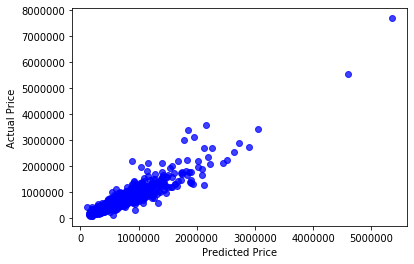

In [5]:
X=dataset.drop('price',axis=1)
y=dataset[['price']]
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
(trainData, testData, trainLabels, testLabels) = train_test_split(X, y, test_size=0.10)
my_model = RandomForestRegressor(n_estimators = 400, random_state = 0)
my_model.fit(trainData, trainLabels)
predicted_prices = my_model.predict(testData)
acc=my_model.score(testData,testLabels)
print(acc)
from sklearn.metrics import accuracy_score
#acc1=accuracy_score(testLabels,predicted_prices)
#print(acc1)
#print(classification_report(testLabels, predicted_prices))
plt.scatter(predicted_prices, testLabels, alpha=.75, color='b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')

In [6]:
from sklearn import ensemble
clf=ensemble.GradientBoostingRegressor(n_estimators=400,max_depth=5,min_samples_split=2,learning_rate=0.1,loss='ls')

In [7]:
clf.fit(trainData,trainLabels)

C:\Users\padhu\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [8]:
clf.score(testData,testLabels)

0.8961252344168993

In [9]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(dataset))
print(z)

[[0.86665696 0.39881195 1.44729656 ... 0.94335843 0.26074894 0.5447559 ]
 [0.0057152  0.39881195 0.17561515 ... 0.4327119  0.18790881 0.68094566]
 [0.98077737 1.47398707 1.44729656 ... 1.0700479  0.17241792 1.29379959]
 ...
 [0.37585479 1.47398707 1.77187891 ... 1.41023526 0.39416101 1.2938059 ]
 [0.38157715 0.39881195 0.50019749 ... 0.84122912 0.42052848 1.12356869]
 [0.58584995 1.47398707 1.77187891 ... 1.41023526 0.41796497 1.25975846]]


In [10]:
threshold = 3
print(np.where(z > 3))
df_out = dataset[(z < 3).all(axis=1)]

(array([    1,     5,     5, ..., 21585, 21585, 21595], dtype=int64), array([11,  2,  3, ..., 10, 14,  9], dtype=int64))


In [11]:
df_out.shape

(18813, 17)

C:\Users\padhu\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


0.8849151366932332


Text(0, 0.5, 'Actual Price')

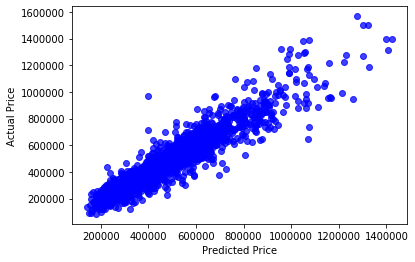

In [13]:
X1=df_out.drop('price',axis=1)
y1=df_out[['price']]

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
(trainData1, testData1, trainLabels1, testLabels1) = train_test_split(X1, y1, test_size=0.10)
my_model = RandomForestRegressor(n_estimators = 400, random_state = 0)
my_model.fit(trainData1, trainLabels1)
predicted_prices1 = my_model.predict(testData1)
acc1=my_model.score(testData1,testLabels1)
print(acc1)
from sklearn.metrics import accuracy_score
#acc1=accuracy_score(testLabels,predicted_prices)
#print(acc1)
#print(classification_report(testLabels, predicted_prices))
plt.scatter(predicted_prices1, testLabels1, alpha=.75, color='b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')

In [14]:
from sklearn import ensemble
clf=ensemble.GradientBoostingRegressor(n_estimators=400,max_depth=5,min_samples_split=2,learning_rate=0.1,loss='ls')

In [16]:
clf.fit(trainData1,trainLabels1)

C:\Users\padhu\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [17]:
clf.score(testData1,testLabels1)

0.8906232776429079